# Prevendo a ocorrência de AVC

#### "Exercício realizado durante o curso Data Science Aplicada à Área de Saúde da Data Science Academy"

### 1) Problema de negócio

O AVC(Acidente Vascular Cerebral) está entre as doenças que mais matam no Brasil e no Mundo, além disso, cerca de 70% das pessoas que sofrem um derrame não retorna ao trabalho depois do acidente vascular cerebral e 50% ficam dependentes de outras pessoas no dia a dia.

Ele ocorre quando o suprimento de sangue que vai para o cérebro é interrompido ou reduzido drasticamente, privando as células de nutrientes e oxigênio. 

O AVC pode ser do tipo isquêmico, quando há obstruçao de uma artéria ou do tipo hemorrágico, quando há rompimento de um vaso cerebral provocando hemorragia.

Os principais fatores de risco para desenvolver um AVC são: hipertensão, diabeste tipo 2, obesidade, tabagismoo, sedentarismo, idade avançada, ser do sexo masculino

Tendo em vista a importância desse problema de saúde pública, criaremos um modelo capaz de prever a ocorrência de AVC baseado nos fatores de risco.

### 2) Carregando os Dados

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
%matplotlib inline

In [4]:
# Carregando os dados
dataset = pd.read_csv('dados/dataset-data-munging-01.csv')

In [5]:
# Visualizando os primeiros registros
dataset.head(5)

,id,sexo,idade,hipertensao,doenca_coracao,casado,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,30669,Masculino,3.0,0,0,No,crianca,Rural,95.12,18.0,NaN,0
1,30468,Masculino,58.0,1,0,Yes,Privado,Urbana,87.96,39.2,nunca fumou,0
2,16523,Feminino,8.0,0,0,No,Privado,Urbana,110.89,17.6,NaN,0
3,56543,Feminino,70.0,0,0,Yes,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,46136,Masculino,14.0,0,0,No,Nunca_trabalhou,Rural,161.28,19.1,NaN,0


In [6]:
# Formato dos dados
dataset.shape

(43400, 12)

In [7]:
#tipos dos dados
dataset.dtypes

id                       int64
sexo                    object
idade                  float64
hipertensao              int64
doenca_coracao           int64
casado                  object
tipo_trabalho           object
tipo_residencia         object
media_nivel_glicose    float64
imc                    float64
status_tabagismo        object
avc                      int64
dtype: object

In [8]:
#valores da classe alvo AVC
dataset['avc'].value_counts()

0    42617
1      783
Name: avc, dtype: int64

### 3) Data Munging - Preparando dados para a análise exploratória

### 3.1 - Identificando e Removendo Colunas Irrelevantes

Temos algumas colunas em nosso dataset, que parecem influenciar pouco no fato da pessoa desenvolver um AVC, sendo assim, vamos removê-las.

In [9]:
# Excluímos a coluna id porque esse é apenas um número atribuído a cada paciente sem relevância 
del dataset['id']

In [10]:
# Excluímos a coluna "casado", já que não parece ser uma boa variável preditora para se ter AVC
del dataset['casado']

In [11]:
# Coletando estatísticas das colunas
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [12]:
# Extraindo variáveis do tipo categóricas
dfcatname = dataset.dtypes[dataset.dtypes == 'object'].index
dfcatname

Index(['sexo', 'tipo_trabalho', 'tipo_residencia', 'status_tabagismo'], dtype='object')

In [13]:
# Extraindo variáveis do tipo numéricas contínuas
dfconname = [item for item in list(dataset.columns) if item not in list(dfcatname)]
dfconname

['idade', 'hipertensao', 'doenca_coracao', 'media_nivel_glicose', 'imc', 'avc']

In [14]:
# Descrevendo as variáveis categóricas
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43400,43400,43400,30108
unique,3,5,2,3
top,Feminino,Privado,Urbana,nunca fumou
freq,25665,24834,21756,16053


### 3.2 - Tratamento de Valores Missing no IMC

In [15]:
# Coletando estatísticas das colunas
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Pela análise acima, vemos que a variável "imc" está com valores ausentes 

In [19]:
# Descrevendo a coluna IMC
dataset['imc'].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: imc, dtype: float64

In [20]:
# Checando por valores missing
dataset['imc'].isnull().sum() 

1462

Uma forma de tratarmos esses valores ausentes, seria simplesmente removê-los. No nosso caso, teríamos que remover 1462/43400, o que é relativamente pequeno.

Outra opção, seria fazer imputação, como a média ou mediana. Para verificar tal possibilidade, vamos fazer o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0ADDF628>]],
      dtype=object)

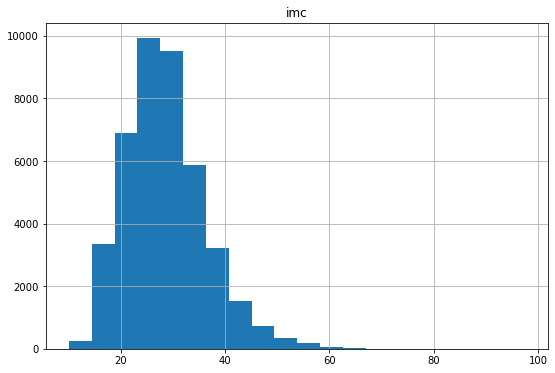

In [21]:
dataset.hist(column = 'imc', figsize=(9,6), bins=20)

Vê-se no histograma que o valor de IMC entre 20 e 40 é o mais comum, portanto, não é totalmente irracional utilizá-lo no lugar de valores missing.

Vamos imputar a média no lugar de valores ausentes.

In [22]:
# Gera o novo imc; Onde for nulo, preenche com a média, senão, mantemos o valor atual.

novo_imc = np.where(dataset['imc'].isnull(), dataset['imc'].mean(), dataset['imc'])

In [23]:
novo_imc

array([18. , 39.2, 17.6, ..., 28.9, 33.2, 20.6])

In [24]:
# Grava o novo valor do imc no dataset
dataset['imc'] = novo_imc

In [25]:
dataset['imc'].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AE22F40>]],
      dtype=object)

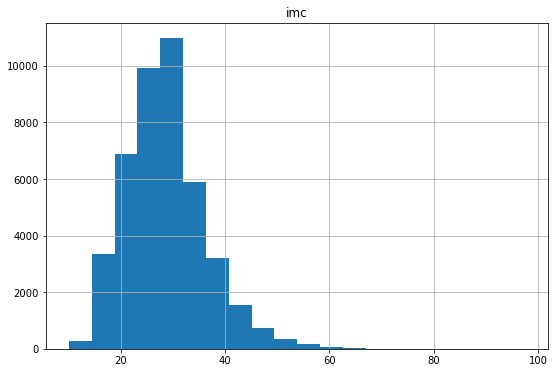

In [26]:
# Checando o histograma
dataset.hist(column = 'imc', figsize=(9,6), bins=20)

### 3.3 - Tratamento de Valores Missing no Status de Tabagismo

In [27]:
# Descrevendo as variáveis categóricas
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43400,43400,43400,30108
unique,3,5,2,3
top,Feminino,Privado,Urbana,nunca fumou
freq,25665,24834,21756,16053


Pela análise acima, vemos que a variável "status_tabagismo" contém valores ausentes

In [28]:
dataset['status_tabagismo'].describe()

count           30108
unique              3
top       nunca fumou
freq            16053
Name: status_tabagismo, dtype: object

In [29]:
dataset['status_tabagismo'].isnull().sum() 

13292

In [30]:
dataset['status_tabagismo'].value_counts()

nunca fumou           16053
fuma eventualmente     7493
fuma                   6562
Name: status_tabagismo, dtype: int64

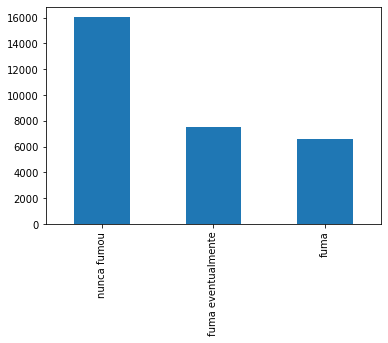

In [31]:
dataset['status_tabagismo'].value_counts().plot(kind='bar')

A princípio, vamos preencher os valores missing com uma nova categoria chamada "desconhecido".

In [32]:
novo_status_tabagismo = np.where(dataset['status_tabagismo'].isnull(), "desconhecido", dataset['status_tabagismo'])

In [33]:
dataset['status_tabagismo'] = novo_status_tabagismo

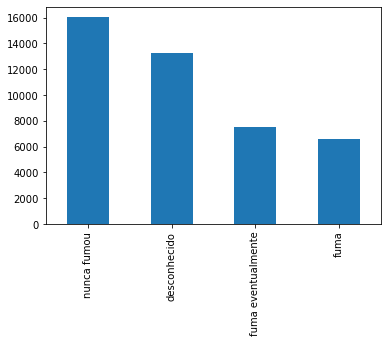

In [34]:
dataset['status_tabagismo'].value_counts().plot(kind='bar')

In [35]:
dataset.count()

sexo                   43400
idade                  43400
hipertensao            43400
doenca_coracao         43400
tipo_trabalho          43400
tipo_residencia        43400
media_nivel_glicose    43400
imc                    43400
status_tabagismo       43400
avc                    43400
dtype: int64

### 3.4 - Tratamento de Outliers

In [36]:
dataset[dfconname]

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
0,3.0,0,0,95.12,18.0,0
1,58.0,1,0,87.96,39.2,0
2,8.0,0,0,110.89,17.6,0
3,70.0,0,0,69.04,35.9,0
4,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0
43396,56.0,0,0,213.61,55.4,0
43397,82.0,1,0,91.94,28.9,0
43398,40.0,0,0,99.16,33.2,0


Vamos verificar os valores mínimos e máximso de cada uma das variáveis 'idade', 'media_nivel_glicose' e 'imc'

In [37]:
dataset[dfconname[0]].describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: idade, dtype: float64

In [38]:
dataset[dfconname[3]].describe()

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: media_nivel_glicose, dtype: float64

In [39]:
dataset[dfconname[4]].describe()

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
25%         23.400000
50%         28.100000
75%         32.600000
max         97.600000
Name: imc, dtype: float64

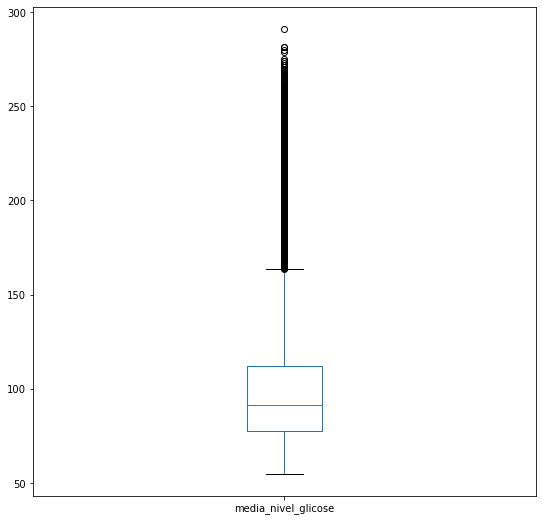

In [40]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados; Variável media_nivel_glicose

dataset[dfconname[3]].plot(kind="box", figsize=(9,9))

In [41]:
# Removendo outliers
index1 = np.where(dataset["media_nivel_glicose"] == max(dataset["media_nivel_glicose"]) )

In [43]:
#localizando o outlier
dataset.loc[index1]

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
38446,Feminino,80.0,0,0,Privado,Rural,291.05,28.7,nunca fumou,0


In [44]:
dataset = dataset.drop(index1[0])

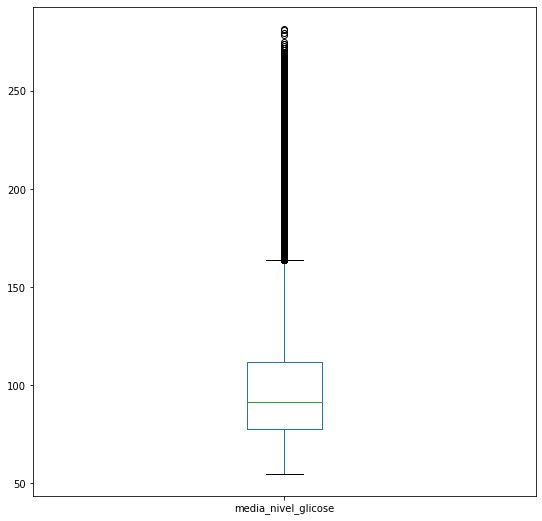

In [45]:
# Verificando novamente a variável 'media_nivel_glicose'
dataset[dfconname[3]].plot(kind="box", figsize=(9,9))

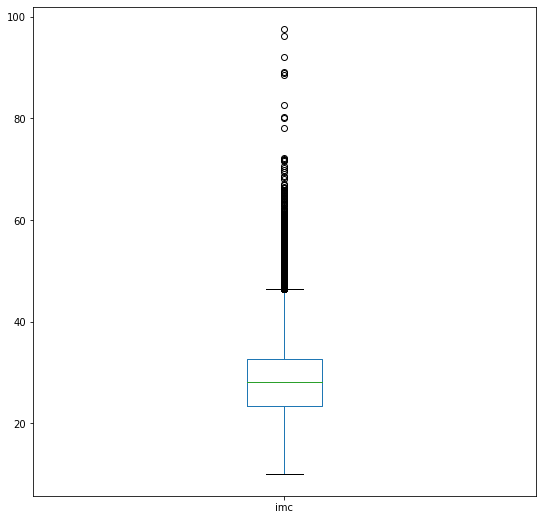

In [46]:
# Verificando outliers para recursos numéricos em nosso conjunto de dados; Variável imc
dataset[dfconname[4]].plot(kind="box", figsize=(9,9))

In [47]:
index2 = np.where(dataset["imc"] == max(dataset["imc"]) )

In [48]:
dataset.loc[index2]

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
1913,Masculino,17.0,1,0,Privado,Rural,61.67,97.6,desconhecido,0


O valor máximo que o IMC pode chegar é 54. Em nosso banco de dados temos alguns valores que ultrapassam isso e podem interferir nas métricas. Sendo assim, vamos fazer um corte e remover todos com valores maiores do que 60.

In [49]:
dataset = dataset[dataset['imc'] < 60]

In [50]:
dataset.count()

sexo                   43309
idade                  43309
hipertensao            43309
doenca_coracao         43309
tipo_trabalho          43309
tipo_residencia        43309
media_nivel_glicose    43309
imc                    43309
status_tabagismo       43309
avc                    43309
dtype: int64

In [51]:
dataset.describe()

,idade,hipertensao,doenca_coracao,media_nivel_glicose,imc,avc
count,43309.000000,43309.00000,43309.000000,43309.000000,43309.000000,43309.000000
mean,42.213087,0.09326,0.047542,104.442117,28.526248,0.018079
std,22.533671,0.29080,0.212798,43.060134,7.438084,0.133240
min,0.080000,0.00000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.00000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.00000,0.000000,91.570000,28.000000,0.000000
75%,60.000000,0.00000,0.000000,112.030000,32.600000,0.000000
max,82.000000,1.00000,1.000000,281.590000,59.900000,1.000000


In [52]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,Masculino,3.0,0,0,crianca,Rural,95.12,18.0,desconhecido,0
1,Masculino,58.0,1,0,Privado,Urbana,87.96,39.2,nunca fumou,0
2,Feminino,8.0,0,0,Privado,Urbana,110.89,17.6,desconhecido,0
3,Feminino,70.0,0,0,Privado,Rural,69.04,35.9,fuma eventualmente,0
4,Masculino,14.0,0,0,Nunca_trabalhou,Rural,161.28,19.1,desconhecido,0


### 3.5 - Convertendo Variáveis Categóricas em Valores Numéricos

Analisando os tipos únicos das variáveis categóricas

In [53]:
dataset[dfcatname].head()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
0,Masculino,crianca,Rural,desconhecido
1,Masculino,Privado,Urbana,nunca fumou
2,Feminino,Privado,Urbana,desconhecido
3,Feminino,Privado,Rural,fuma eventualmente
4,Masculino,Nunca_trabalhou,Rural,desconhecido


In [54]:
dataset[dfcatname].describe()

,sexo,tipo_trabalho,tipo_residencia,status_tabagismo
count,43309,43309,43309,43309
unique,3,5,2,4
top,Feminino,Privado,Urbana,nunca fumou
freq,25605,24770,21712,16016


In [55]:
dataset['sexo'].unique()

array(['Masculino', 'Feminino', 'Outro'], dtype=object)

In [56]:
dataset['tipo_residencia'].unique()

array(['Rural', 'Urbana'], dtype=object)

Nas variáveis com 3 ou menos categorias, usaremos Label Encoding. No caso, 'sexo' e 'tipo_residencia'.

In [57]:
dataset['sexo'] = dataset['sexo'].astype('category')

In [58]:
dataset['tipo_residencia'] = dataset['tipo_residencia'].astype('category')

In [59]:
dataset['sexo'] = dataset['sexo'].cat.codes

In [60]:
dataset['tipo_residencia'] = dataset['tipo_residencia'].cat.codes

In [61]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_trabalho,tipo_residencia,media_nivel_glicose,imc,status_tabagismo,avc
0,1,3.0,0,0,crianca,0,95.12,18.0,desconhecido,0
1,1,58.0,1,0,Privado,1,87.96,39.2,nunca fumou,0
2,0,8.0,0,0,Privado,1,110.89,17.6,desconhecido,0
3,0,70.0,0,0,Privado,0,69.04,35.9,fuma eventualmente,0
4,1,14.0,0,0,Nunca_trabalhou,0,161.28,19.1,desconhecido,0


Nas colunas com 3 ou mais categorias, usaremos One-Hot Encoding. Essa técnica aumentará o número de colunas no nosso conjunto de dados. No caso, será a coluna 'tipo_trabalho' e 'status_tabagismo'.

In [62]:
dataset = pd.get_dummies(dataset, columns = ['tipo_trabalho','status_tabagismo'], prefix = ["trabalho",'tabagismo'])

In [63]:
dataset.head()

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,avc,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,3.0,0,0,0,95.12,18.0,0,0,0,0,0,1,1,0,0,0
1,1,58.0,1,0,1,87.96,39.2,0,0,0,1,0,0,0,0,0,1
2,0,8.0,0,0,1,110.89,17.6,0,0,0,1,0,0,1,0,0,0
3,0,70.0,0,0,0,69.04,35.9,0,0,0,1,0,0,0,0,1,0
4,1,14.0,0,0,0,161.28,19.1,0,0,1,0,0,0,1,0,0,0


### 4) Modelagem preditiva - Machine Learning - Classificação

Agora vamos usar os dados processados para criar um algoritmo de classificação.

### 4.1 - Divisão dos dados em treino e teste

In [64]:
dataset.describe()

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,avc,trabalho_Autonomo,trabalho_Nunca_trabalhou,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
count,43309.000000,43309.000000,43309.00000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000,43309.000000
mean,0.409037,42.213087,0.09326,0.047542,0.501328,104.442117,28.526248,0.018079,0.156480,0.004087,0.571937,0.125378,0.142118,0.306380,0.151123,0.172689,0.369808
std,0.492178,22.533671,0.29080,0.212798,0.500004,43.060134,7.438084,0.133240,0.363314,0.063799,0.494804,0.331151,0.349175,0.460995,0.358173,0.377983,0.482758
min,0.000000,0.080000,0.00000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.00000,0.000000,1.000000,91.570000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,1.000000,112.030000,32.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,82.000000,1.00000,1.000000,1.000000,281.590000,59.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos dividir os dados em X e Y, sendo que o Y é a minha variável alvo, a que eu quero prever. No nosso caso, será 'avc'.

In [65]:
# Divisão dos dados em X e Y
X = dataset.loc[:, dataset.columns != 'avc']
Y = dataset['avc']

In [66]:
# Parâmetros para a divisão dos dados em treino e teste
seed = 7
test_size = 0.33

Vamos usar a função 'train_test_split' do framework 'sklearn'

In [67]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = test_size, random_state = seed)

In [68]:
X_treino.shape

(29017, 16)

In [69]:
X_teste.shape

(14292, 16)

In [70]:
y_treino.shape

(29017,)

In [71]:
y_teste.shape

(14292,)

### 4.2 - Criando o Classificador

Em nosso modelo, vamos usar o algoritmo Random Forest Classifier. Um modelo de aprendizagem supervisionada, que faz parte dos métodos ensemble, um conjunto de árvores de decisão. No qual há a combinação de diferentes modelos para se chegar a um resultado.

In [72]:
# Imports
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [73]:
import sklearn as sk

In [74]:
# Cria o classificador
modelo = RandomForestClassifier()

# Treina e cria o modelo
modelo.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
# Previsões com dados de teste
y_pred = modelo.predict(X_teste)

Avaliando as previsões do modelo, utilizando a acurácia.

In [76]:
# Avaliando as previsões
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_teste, y_pred)
print("Acurácia: %.2f%%" % (acuracia * 100.0))

Acurácia: 98.25%


### 5) Fazendo Previsões com Novos Dados

Uma vez criado o modelo, vamos apresentá-lo novos dados e fazer previsões.

In [77]:
# Carrega os dados
dataset_novos_dados = pd.read_csv('dados/dataset-data-munging-01-novos_dados.csv')

### 5.1 - Aplicamos aos novos dados as mesmas manipulações que foram feitas com os dados de treinamento.

In [78]:
del dataset_novos_dados['casado']

In [79]:
novo_status_tabagismo = np.where(dataset_novos_dados['status_tabagismo'].isnull(), 
                                 "desconhecido", 
                                 dataset_novos_dados['status_tabagismo'])

In [80]:
dataset_novos_dados['status_tabagismo'] = novo_status_tabagismo

In [81]:
dataset_novos_dados.isnull().any()

id                     False
sexo                   False
idade                  False
hipertensao            False
doenca_coracao         False
tipo_trabalho          False
tipo_residencia        False
media_nivel_glicose    False
imc                     True
status_tabagismo       False
dtype: bool

In [82]:
novo_imc = np.where(dataset_novos_dados['imc'].isnull(), 
                    dataset_novos_dados['imc'].mean(), 
                    dataset_novos_dados['imc'])

In [83]:
dataset_novos_dados['imc'] = novo_imc

In [84]:
dataset_novos_dados.isnull().any()

id                     False
sexo                   False
idade                  False
hipertensao            False
doenca_coracao         False
tipo_trabalho          False
tipo_residencia        False
media_nivel_glicose    False
imc                    False
status_tabagismo       False
dtype: bool

In [85]:
dataset_novos_dados['sexo'] = dataset_novos_dados['sexo'].astype('category')
dataset_novos_dados['tipo_residencia'] = dataset_novos_dados['tipo_residencia'].astype('category')
dataset_novos_dados['sexo'] = dataset_novos_dados['sexo'].cat.codes
dataset_novos_dados['tipo_residencia'] = dataset_novos_dados['tipo_residencia'].cat.codes
dataset_novos_dados = pd.get_dummies(dataset_novos_dados, columns = ['tipo_trabalho','status_tabagismo'], prefix = [ "trabalho",'tabagismo'])
dataset_novos_dados

,id,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,36306,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,61829,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,14152,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,12997,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,40801,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,1,20.0,0,0,0,74.43,18.4,0,0,1,0,0,0,0,1,0
18597,362,1,61.0,0,0,0,211.55,31.6,0,0,0,1,0,0,1,0,0
18598,29839,0,79.0,0,0,0,125.74,29.4,0,0,1,0,0,0,0,0,1
18599,6438,1,55.0,0,0,0,69.46,33.8,0,0,0,1,0,0,0,0,1


In [86]:
# Separando a coluna id para usarmos mais tarde
X_novos_dados = dataset_novos_dados.loc[:, dataset_novos_dados.columns != 'id']
paciente_id = dataset_novos_dados['id']
X_novos_dados

,sexo,idade,hipertensao,doenca_coracao,tipo_residencia,media_nivel_glicose,imc,trabalho_Autonomo,trabalho_Never_worked,trabalho_Privado,trabalho_Servidor_Publico,trabalho_crianca,tabagismo_desconhecido,tabagismo_fuma,tabagismo_fuma eventualmente,tabagismo_nunca fumou
0,1,80.0,0,0,1,83.84,21.1,0,0,1,0,0,0,0,1,0
1,0,74.0,0,1,0,179.50,26.0,1,0,0,0,0,0,0,1,0
2,0,14.0,0,0,0,95.16,21.2,0,0,0,0,1,1,0,0,0
3,1,28.0,0,0,1,94.76,23.4,0,0,1,0,0,1,0,0,0
4,0,63.0,0,0,0,83.57,27.6,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18596,1,20.0,0,0,0,74.43,18.4,0,0,1,0,0,0,0,1,0
18597,1,61.0,0,0,0,211.55,31.6,0,0,0,1,0,0,1,0,0
18598,0,79.0,0,0,0,125.74,29.4,0,0,1,0,0,0,0,0,1
18599,1,55.0,0,0,0,69.46,33.8,0,0,0,1,0,0,0,0,1


### 5.2 - Previsões com o Modelo Treinado

In [87]:
# Usando dados de teste para as previsões
Y_novos_dados_label = modelo.predict(X_novos_dados)
Y_novos_dados_prob = modelo.predict_proba(X_novos_dados)

In [88]:
Y_novos_dados_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
Y_novos_dados_prob

array([[0.98, 0.02],
       [0.96, 0.04],
       [1.  , 0.  ],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [90]:
# Extraindo todas as previsões

# Cria um vetor vazio
Y_novos_dados = [None] * len(X_novos_dados)

# Looop pelas previsões e gravações no vetor de previsões
for i in range(len(X_novos_dados)):
    Y_novos_dados[i] = Y_novos_dados_prob[i]

In [91]:
# Vetor de previsões
Y_novos_dados[:5]

[array([0.98, 0.02]),
 array([0.96, 0.04]),
 array([1., 0.]),
 array([1., 0.]),
 array([0.99, 0.01])]

In [92]:
# Salvando o resultado com as previsões para cada paciente
resultado = pd.DataFrame()
resultado['id'] = paciente_id
resultado['avc'] = Y_novos_dados
resultado.to_csv('dados/resultado.csv', index = False)

# Fim